In [44]:
import networkx as nx
import pandas as pd
from networkx.algorithms.assortativity.mixing import mixing_dict
from networkx.utils import dict_to_numpy_array
from networkx.utils import accumulate
import scipy.stats as stats
import numpy as np  
import matplotlib.pyplot as plt 
import math
#import powerlaw
import matplotlib


In [45]:
from richclub import rich_club_coefficient_degree
from richclub import rich_club_coefficient_rank
from SecondOrderCoefficient import second_order_max_degree
from SecondOrderCoefficient import second_order_average_degree

In [ ]:
train = pd.read_csv('51____01Scientist.csv')

In [47]:
a = []
for i in range(len(train['node_A'])):
    a.append( [train['node_A'][i],train['node_B'][i]])


In [48]:
G = nx.Graph(a)

In [49]:
len(G.degree())

11174

In [31]:
avg_kt = sum(nx.triangles(G).values()) / len(nx.triangles(G))

In [32]:
avg_kt

13.73038830372583

In [33]:
nx.average_clustering(G)

0.6517200169513229

In [34]:
degree_rich_club_G = rich_club_coefficient_degree(G)
    
xxx_G = []
yyy_G = []
for iii in range(len(degree_rich_club_G)):
    xxx_G.append(degree_rich_club_G[iii][0])
for iii in range(len(degree_rich_club_G)):
    yyy_G.append(degree_rich_club_G[iii][1])

Xii = np.array(np.log10(xxx_G[6:40]))
Yii = np.array(np.log10(yyy_G[6:40]))

Xitaa = np.polyfit(Xii, Yii, 1)[0]

In [35]:
Xitaa

1.9197718625731437

In [24]:
Xita

-2.9800507388390742

In [13]:
nx.degree_histogram(G)[3]/len(G.degree()) * 100

14.526017921710425

In [7]:
len(G.edges())

39967

In [6]:
len(G.degree())

12722

In [7]:
second_order_max_degree(G)

0.6474450616255778

In [8]:
second_order_average_degree(G)

0.68264877783386468

In [16]:
degree_rich_club = rich_club_coefficient_degree(G)

In [8]:
rank_rich_club = rich_club_coefficient_rank(G)

# Data processing

In [23]:
#move A - A link. Two end nodes is the same.
for node_ID in G.degree(set(G)):
    for node_A , node_B in G.edges(node_ID):
        if node_A == node_B:
            G.remove_edge(node_A,node_B)
            
#when exist A-B and B-A, Delete one of them.
"""
for node_A_ID in G.degree(set(G)):
    A_neighbors = (nbr_A for _,nbr_A in G.edges(node_A_ID))
    for node_B_ID in A_neighbors:
        B_neighors = (nbr_B for _,nbr_B in G.edges(node_B_ID))
        if node_A_ID in B_neighors:
            G.remove_edge(node_A_ID,node_B_ID)
            G.add_edge(node_A_ID,node_B_ID)
"""
#get the largest connected component          
G = max(nx.connected_component_subgraphs(G), key=len)

#change node ID to rank degree
    

# Rich-club coefficient (node degree)

In [22]:
def degree_rich_club_coefficient(G):
    deg = G.degree()
    rich_club = []
    rich_club_coefficient = 0.0
    for x in range(1,max(G.degree().items(), key=lambda x: x[1])[1]+1):
        a  = dict((k, v) for k, v in deg.items() if v > x)
        N = len(a)
        if N == 1:
            break
        nodes = set(a)
        edges = 0
        for start_id, end_id in G.edges(nodes):
            if start_id in nodes:
                if end_id in nodes:
                    edges = edges + 1
        if rich_club_coefficient != edges/((N*(N-1))/2):
            rich_club_coefficient = edges/((N*(N-1))/2) 
            if rich_club_coefficient != 0:
                rich_club.append((x,rich_club_coefficient))
    return rich_club
                
    

In [23]:
degree_rich_club = degree_rich_club_coefficient(G)

In [24]:
degree_rich_club

[(1, 0.000587290951033764),
 (2, 0.0007824572423302182),
 (3, 0.0010508951709585542),
 (4, 0.0013730045520337312),
 (5, 0.0017831359529160093),
 (6, 0.002235986908057652),
 (7, 0.0027461758743390183),
 (8, 0.003333523805699654),
 (9, 0.0040187636641502225),
 (10, 0.004803081805240745),
 (11, 0.005655187051782334),
 (12, 0.006715852246785244),
 (13, 0.007682465953379251),
 (14, 0.008881429279192745),
 (15, 0.009959821175937977),
 (16, 0.011226166529733406),
 (17, 0.012690535271180433),
 (18, 0.014571082396077163),
 (19, 0.016878248274686886),
 (20, 0.018850304371887106),
 (21, 0.01953727506426735),
 (22, 0.021405607102996785),
 (23, 0.0229689404446686),
 (24, 0.02513595469012355),
 (25, 0.02801528695426869),
 (26, 0.029828635490070466),
 (27, 0.03309851859525536),
 (28, 0.03672316384180791),
 (29, 0.03734472049689441),
 (30, 0.04044357469015003),
 (31, 0.04079254079254079),
 (32, 0.04436945381827272),
 (33, 0.0486651411136537),
 (34, 0.05198776758409786),
 (35, 0.053650326109825376),
 (

# Rich-club coefficient (node rank)

In [45]:
def rank_rich_club_coefficient(G):
    deg = G.degree()
    rich_club = []
    rich_club_coefficient = 0.0
    rank_deg =sorted(G.degree().items(), key=lambda d: d[1],reverse=True)
    for x in range(2,len(deg)+1):
        a = dict(rank_deg[:x])
        nodes = set(a)
        edges = 0
        for start_id, end_id in G.edges(nodes):
            if start_id in nodes:
                if end_id in nodes:
                    edges = edges + 1
        rich_club_coefficient = edges/((x*(x-1))/2) 
        if rich_club_coefficient != 0:
            rich_club.append((x,rich_club_coefficient))
    return rich_club

In [46]:
rank_rich_club = rank_rich_club_coefficient(G)

In [47]:
rank_rich_club

[(3, 0.3333333333333333),
 (4, 0.16666666666666666),
 (5, 0.2),
 (6, 0.13333333333333333),
 (7, 0.09523809523809523),
 (8, 0.07142857142857142),
 (9, 0.05555555555555555),
 (10, 0.044444444444444446),
 (11, 0.05454545454545454),
 (12, 0.06060606060606061),
 (13, 0.05128205128205128),
 (14, 0.04395604395604396),
 (15, 0.0380952380952381),
 (16, 0.041666666666666664),
 (17, 0.051470588235294115),
 (18, 0.06535947712418301),
 (19, 0.06432748538011696),
 (20, 0.06315789473684211),
 (21, 0.05714285714285714),
 (22, 0.06060606060606061),
 (23, 0.05928853754940711),
 (24, 0.057971014492753624),
 (25, 0.056666666666666664),
 (26, 0.055384615384615386),
 (27, 0.05413105413105413),
 (28, 0.05026455026455026),
 (29, 0.05172413793103448),
 (30, 0.05517241379310345),
 (31, 0.05806451612903226),
 (32, 0.056451612903225805),
 (33, 0.058712121212121215),
 (34, 0.0570409982174688),
 (35, 0.06218487394957983),
 (36, 0.06507936507936508),
 (37, 0.06456456456456457),
 (38, 0.06116642958748222),
 (39, 0.06

# First-order Excess Degree

In [14]:
nx.degree_assortativity_coefficient(G)

0.16122729116336298

In [7]:
nx.degree_pearson_correlation_coefficient(G)

-0.13735064184337092

# Secord-order Largest Degree

In [37]:
def node_neighbor_max_degree_xy(G, x='out', y='in', weight=None, nodes=None):
    if nodes is None:
        nodes = set(G)
    else:
        nodes = set(nodes)
    xdeg = G.degree
    ydeg = G.degree
    for start_node_ID in xdeg(nodes):
        end_node = (nbr for _,nbr in G.edges(start_node_ID) if nbr in nodes)
        for end_node_ID in end_node:
            nbrdeg_start = G.degree(G[start_node_ID])
            nbrdeg_end = G.degree(G[end_node_ID])
            
            nbrdeg_start.pop(end_node_ID)
            nbrdeg_end.pop(start_node_ID)
            a = []
            b = []
            for n in nbrdeg_start:                
                a.append(nbrdeg_start[n])
            if a:
                degu = max(a) - 1
            else:
                degu = 1
            for m in nbrdeg_end:
                b.append(nbrdeg_end[m])
            if b:
                degv = max(b) - 1 
            else:
                degv = 1
            
            yield degu,degv

## method 1

In [38]:
xy=node_neighbor_max_degree_xy(G)
x,y=zip(*xy)
stats.pearsonr(x,y)[0]


0.6474450616255778

## method 2

In [16]:
def neighbor_max_degree_mixing_dict(G, x='out', y='in', weight=None, 
                       nodes=None, normalized=False):
    xy_iter=node_neighbor_max_degree_xy(G, x=x, y=y, nodes=nodes, weight=weight)
    return mixing_dict(xy_iter,normalized=normalized)

def max_degree_mixing_matrix(G, x='out', y='in', weight=None, 
                         nodes=None, normalized=True):
    d=neighbor_max_degree_mixing_dict(G, x=x, y=y, nodes=nodes, weight=weight)
    s=set(d.keys())
    for k,v in d.items():
        s.update(v.keys())
    m=max(s)            
    mapping=dict(zip(range(m+1),range(m+1)))
    a=dict_to_numpy_array(d,mapping=mapping)
    if normalized:
        a=a/a.sum()
    return a

def numeric_ac(M):
    # M is a numpy matrix or array
    # numeric assortativity coefficient, pearsonr
    try:
        import numpy
    except ImportError:
        raise ImportError('numeric_assortativity requires ',
                          'NumPy: http://scipy.org/')
    if M.sum() != 1.0:
        M=M/float(M.sum())
    nx,ny=M.shape # nx=ny
    x=numpy.arange(nx)
    y=numpy.arange(ny)
    a=M.sum(axis=0)
    b=M.sum(axis=1)
    vara=(a*x**2).sum()-((a*x).sum())**2
    varb=(b*x**2).sum()-((b*x).sum())**2
    xy=numpy.outer(x,y)
    ab=numpy.outer(a,b)
    return (xy*(M-ab)).sum()/numpy.sqrt(vara*varb)

In [17]:
M = max_degree_mixing_matrix(G)
numeric_ac(M)

0.64744506162557769

# Secord-order Average Degree 

In [13]:
def node_neighbor_average_degree_xy(G, x='out', y='in', weight=None, nodes=None):
    if nodes is None:
        nodes = set(G)
    else:
        nodes = set(nodes)
    xdeg = G.degree
    ydeg = G.degree
    for start_node_ID in xdeg(nodes):
        end_node = (nbr for _,nbr in G.edges(start_node_ID) if nbr in nodes)
        for end_node_ID in end_node:
            nbrdeg_start = G.degree(G[start_node_ID])
            nbrdeg_end = G.degree(G[end_node_ID])
            
            nbrdeg_start.pop(end_node_ID)
            nbrdeg_end.pop(start_node_ID)
            a = []
            b = []
            for n in nbrdeg_start:                
                a.append(nbrdeg_start[n])
            if a:
                degu = (sum(a) / float(len(a))) - 1
            else:
                degu = 1
            for m in nbrdeg_end:
                b.append(nbrdeg_end[m])
            if b:
                degv = (sum(b) / float(len(b))) - 1
            else:
                degv = 1
            
            yield degu,degv   
    

## method 1 

In [14]:
xy=node_neighbor_average_degree_xy(G)
x,y=zip(*xy)
stats.pearsonr(x,y)[0]

0.68264877783386468

# Show Result

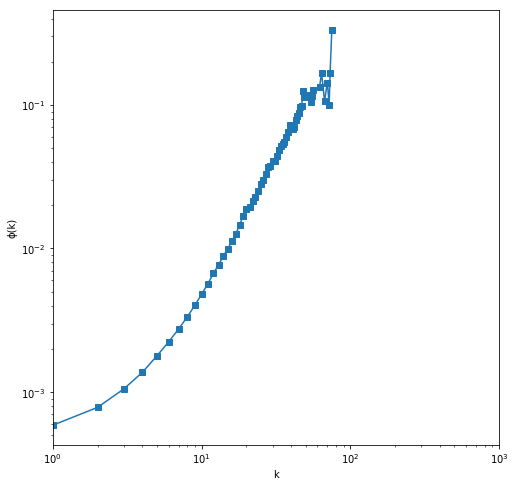

In [17]:
x = []
y = []
for iii in range(len(degree_rich_club)):
    x.append(degree_rich_club[iii][0])
for iii in range(len(degree_rich_club)):
    y.append(degree_rich_club[iii][1])
    
f, ax = plt.subplots(figsize=(8, 8))
ax.set(xscale="log", yscale="log")
ax.plot(x, y,'s-')
plt.xlim(0.0, 1000)
plt.xlabel('k')
plt.ylabel('ϕ(k)')
plt.show()

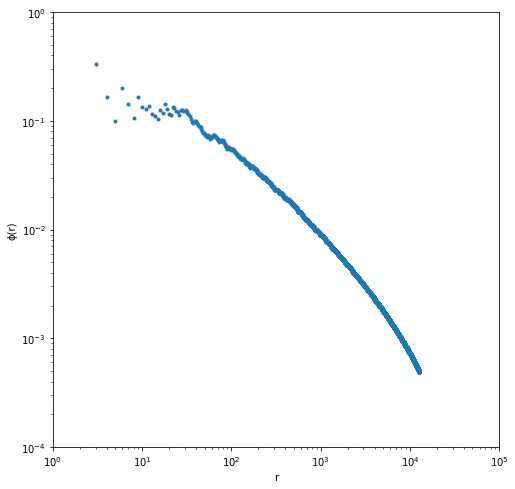

In [25]:
xx = []
yy = []
for iii in range(len(rank_rich_club)):
    xx.append(rank_rich_club[iii][0])
for iii in range(len(rank_rich_club)):
    yy.append(rank_rich_club[iii][1])
    
ff, axx = plt.subplots(figsize=(8, 8))
axx.set(xscale="log", yscale="log")

axx.plot(xx, yy,'.')
plt.ylim(0.0001, 1)
plt.xlim(1, 100000)
plt.xlabel('r')
plt.ylabel('ϕ(r)')
plt.show()